## 1. Imports and Setup
We import necessary libraries and set up custom plot configurations for consistency.

In [1]:

# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Directory setup for custom modules
import sys
module_path = '../../eagleeye'
sys.path.append(module_path)
import EagleEye_v17
from utils_EE_v17 import compute_the_null, partitioning_function

# Custom plotting settings
sns.set(style="darkgrid")
plt.rcParams.update({
    'axes.titlesize': 21,
    'axes.labelsize': 17,
    'xtick.labelsize': 17,
    'ytick.labelsize': 17,
    'legend.fontsize': 17,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'grid.linestyle': '--',
    'grid.color': 'gray'
})


## 2. Data Generation and Preparation
This section defines functions for generating random data points and constructing datasets with anomalies.

In [2]:
# Functions for generating random points and data with anomalies
def generate_random_points(num_points, num_dimensions, radius, shift_factors):
    """Generates random points in 3D with specified characteristic scale."""
    theta, phi = np.random.uniform(0, 2 * np.pi, (2, num_points))
    x = (radius + radius / 6 * np.cos(phi)) * np.cos(theta) + shift_factors[0]
    y = (radius + radius / 6 * np.cos(phi)) * np.sin(theta) + shift_factors[1]
    z = (radius / 6) * np.sin(phi)
    if num_dimensions > 3:
        noise = np.random.normal(0, radius / 2, (num_points, num_dimensions - 3))
        points = np.column_stack((x, y, z, noise))
    else:
        points = np.column_stack((x, y))
    return points

def setup_gaussian_components(num_dimensions=10, background_size=10000, anomaly_size_1=200, anomaly_size_2=200):
    """Sets up Gaussian components for data generation."""
    np.random.seed(77)
    cluster_sizes = [background_size, anomaly_size_1, anomaly_size_2]
    center_shifts = [np.zeros(num_dimensions), 
                     np.array([-0.5, 0] + [0] * (num_dimensions - 3)), 
                     np.array([0.5, 0] + [0] * (num_dimensions - 3))]
    noise_level = 0.01 + np.random.rand() * 0.02
    return num_dimensions, cluster_sizes, center_shifts, noise_level

def generate_data_with_torus_anomalies(num_dimensions, cluster_sizes, anomaly_radius, shift_factors):
    """Generates data with a torus anomaly based on input dimensions and shift factors."""
    np.random.seed(77)
    data_clusters = [np.random.multivariate_normal(np.zeros(num_dimensions), np.eye(num_dimensions), cluster_sizes[0])]
    data_clusters += [generate_random_points(cluster_sizes[i], num_dimensions, anomaly_radius, shift_factors[i-1]) 
                      for i in range(1, 3)]
    return np.vstack(data_clusters)


In [3]:
# Parameters for data generation
sigma_a = 0.3                # Characteristic scale for anomalies
background_size = 100000      # Number of background points
anomaly_size_1 = 100         # Number of points in the first anomaly
anomaly_size_2 = 70         # Number of points in the second anomaly
K_M = 100                    # max neighbourhood size
dim = 10
#%%
#%% EagleEye hyperparameters

p       = .5

#K_M     = 100

p_ext   = 1e-5

n_jobs  = 10


stats_null                     = compute_the_null(p=p, K_M=K_M)


In [4]:
num_dimensions, cluster_sizes, center_shifts, noise_level = setup_gaussian_components(
    num_dimensions=dim, background_size=background_size, anomaly_size_1=anomaly_size_1, anomaly_size_2=anomaly_size_2
)

X = np.random.multivariate_normal([0] * num_dimensions, np.eye(num_dimensions), np.sum(cluster_sizes))

Y = generate_data_with_torus_anomalies(num_dimensions, cluster_sizes, sigma_a, shift_factors=[[0, 1], [-1., -0.5]])
# Generate and process binary sequences with anomalies



In [5]:
#%% Eagle Soar!
# import time
# t = time.time()
result_dict_anom, stats_null = EagleEye_v17.Soar(X, Y, K_M=K_M, p_ext=p_ext, n_jobs=n_jobs, stats_null=stats_null, result_dict_in={})
# elapsed17alt = time.time() - t
# print(f'Elapsed time: {elapsed17alt} seconds')


-----------------------------------------------------------------
Eagle...Soar!
-----------------------------------------------------------------
Compute the nearest neighbours
KNN completed: 0.00 %
KNN completed: 4.99 %
KNN completed: 9.98 %
KNN completed: 14.97 %
KNN completed: 19.97 %
KNN completed: 24.96 %
KNN completed: 29.95 %
KNN completed: 34.94 %
KNN completed: 39.93 %
KNN completed: 44.92 %
KNN completed: 49.92 %
KNN completed: 54.91 %
KNN completed: 59.90 %
KNN completed: 64.89 %
KNN completed: 69.88 %
KNN completed: 74.87 %
KNN completed: 79.86 %
KNN completed: 84.86 %
KNN completed: 89.85 %
KNN completed: 94.84 %
KNN completed: 99.83 %
-----------------------------------------------------------------
Flagging of putative anomalous points
-----------------------------------------------------------------


<IPython.core.display.Math object>

'DONE!'

<IPython.core.display.Math object>

'DONE!'

-----------------------------------------------------------------
Pruning via iterative density equalization (IDE)
-----------------------------------------------------------------


<IPython.core.display.Math object>

'DONE!'

<IPython.core.display.Math object>

'DONE!'

In [6]:

Y_noA = np.random.multivariate_normal([0] * num_dimensions, np.eye(num_dimensions), np.sum(cluster_sizes))
#%% Eagle Soar!
# import time
# t = time.time()
result_dict_no_anom, stats_null = EagleEye_v17.Soar(X, Y_noA, K_M=K_M, p_ext=p_ext, n_jobs=n_jobs, stats_null=stats_null, result_dict_in={})
# elapsed17alt = time.time() - t
# print(f'Elapsed time: {elapsed17alt} seconds')


-----------------------------------------------------------------
Eagle...Soar!
-----------------------------------------------------------------
Compute the nearest neighbours
KNN completed: 0.00 %
KNN completed: 4.99 %
KNN completed: 9.98 %
KNN completed: 14.97 %
KNN completed: 19.97 %
KNN completed: 24.96 %
KNN completed: 29.95 %
KNN completed: 34.94 %
KNN completed: 39.93 %
KNN completed: 44.92 %
KNN completed: 49.92 %
KNN completed: 54.91 %
KNN completed: 59.90 %
KNN completed: 64.89 %
KNN completed: 69.88 %
KNN completed: 74.87 %
KNN completed: 79.86 %
KNN completed: 84.86 %
KNN completed: 89.85 %
KNN completed: 94.84 %
KNN completed: 99.83 %
-----------------------------------------------------------------
Flagging of putative anomalous points
-----------------------------------------------------------------


<IPython.core.display.Math object>

'DONE!'

<IPython.core.display.Math object>

'DONE!'

-----------------------------------------------------------------
Pruning via iterative density equalization (IDE)
-----------------------------------------------------------------


<IPython.core.display.Math object>

'DONE!'

<IPython.core.display.Math object>

'DONE!'

In [7]:
upsilon_values_anomaly = result_dict_anom['Upsilon_i_Y']
upsilon_values_no_anomaly = result_dict_no_anom['Upsilon_i_Y']

In [8]:


from scipy.stats import ks_2samp, anderson_ksamp, cramervonmises_2samp

# Perform the statistical tests
cvm_global = cramervonmises_2samp(upsilon_values_anomaly, upsilon_values_no_anomaly)
ad_global = anderson_ksamp([upsilon_values_anomaly, upsilon_values_no_anomaly])
ks_global = ks_2samp(upsilon_values_anomaly, upsilon_values_no_anomaly)

# Print the results
print(f"Cramér–von Mises statistic: {cvm_global.statistic}, p-value: {cvm_global.pvalue}")
print(f"Anderson-Darling statistic: {ad_global.statistic}, p-value: {ad_global.pvalue}")
print(f"Kolmogorov-Smirnov statistic: {ks_global.statistic}, p-value: {ks_global.pvalue}")

Cramér–von Mises statistic: 0.09993709343689261, p-value: 0.5851868369467417
Anderson-Darling statistic: 1.1590234203577174, p-value: 0.10840486201671878
Kolmogorov-Smirnov statistic: 0.0031646201457522227, p-value: 0.6962473420568827


In [9]:
import matplotlib.pyplot as plt

In [10]:
bins = np.logspace(np.log10(np.min(result_dict_anom['Upsilon_i_Y'])),
                   np.log10(np.max(80)),
                   80)
counts_Upsilon_i, _ = np.histogram(result_dict_anom['Upsilon_i_Y'], bins=bins)
norm_Upsilon_i = counts_Upsilon_i / len(result_dict_anom['Upsilon_i_Y'])

counts_null_distribution, _ = np.histogram(stats_null[p], bins=bins)
norm_null_distribution = counts_null_distribution / len(stats_null[p])
# Compute bin centers and widths (for bar plotting)
bin_centers = np.sqrt(bins[:-1] * bins[1:])  # Geometric mean for log bins.
bin_widths  = np.diff(bins)                    # Width of each bin.


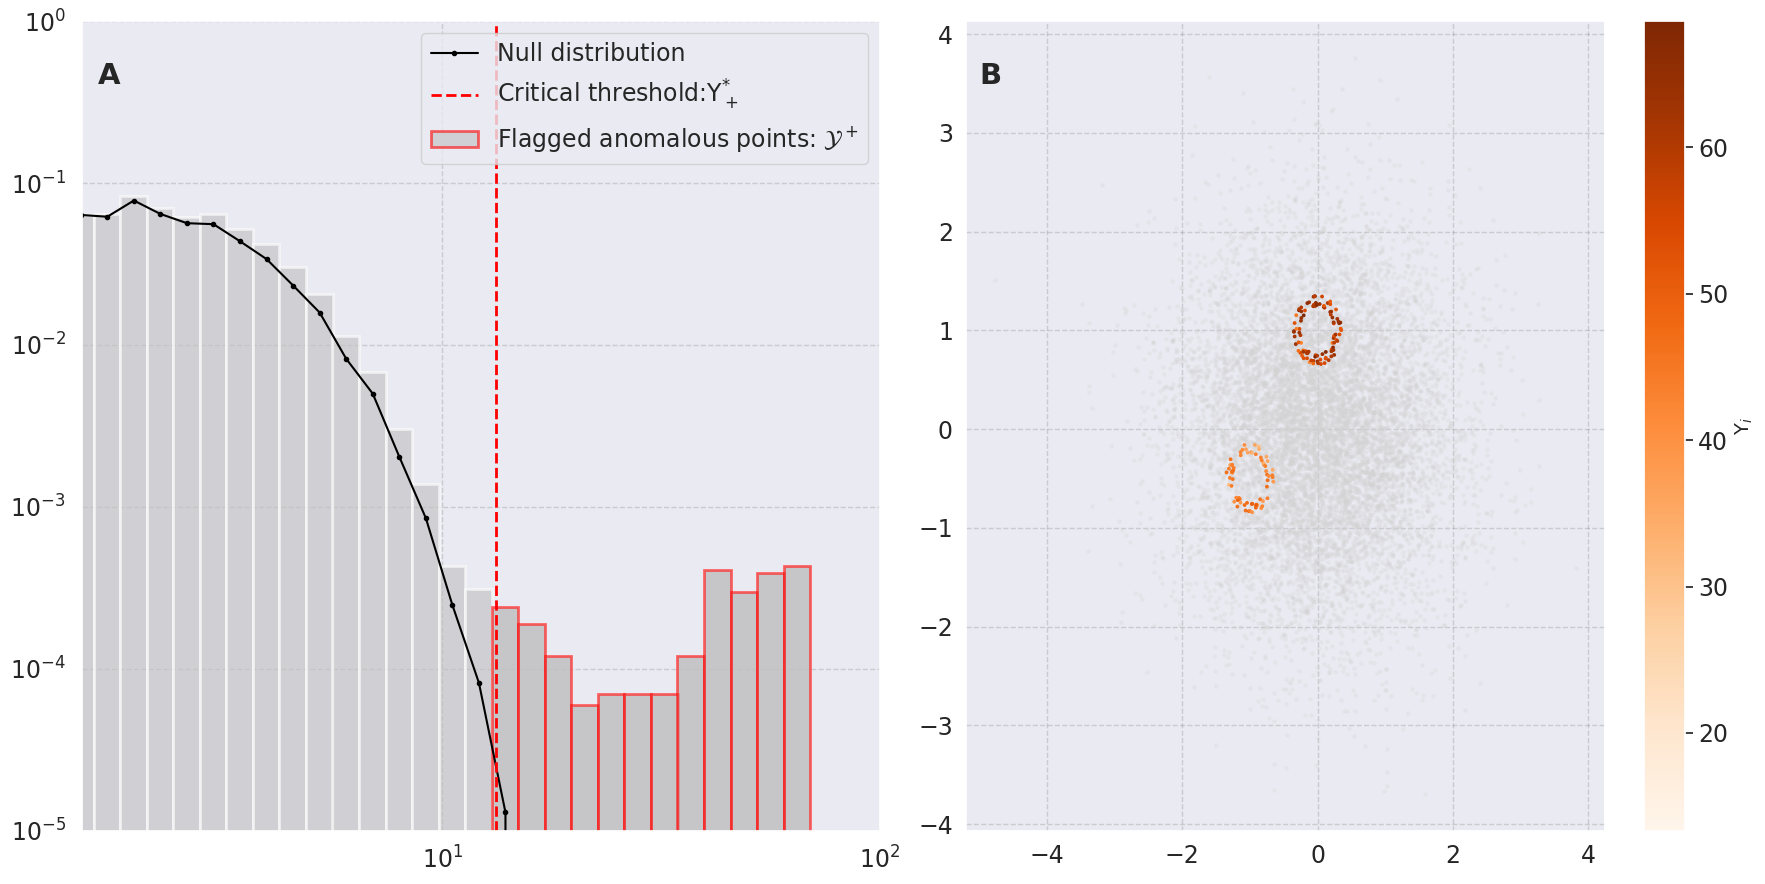

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(18, 9))

ax=axs[0]
vlll = -13
ax.set_xscale('log')
ax.set_yscale('log')

# Increase tick thickness.
ax.tick_params(axis='both', which='major', length=8, width=2)
ax.tick_params(axis='both', which='minor', length=4, width=1.5)

# Plot Original dataset and anomalies as bars with white edges.
#ax.bar(bin_centers, norm_Upsilon_i, width=bin_widths, color='silver',
#       alpha=0.6, edgecolor='white', linewidth=2,
#       label=r'Flagged anomalous points: $\mathcal{Y}^+$', align='center')
# vlll = -50
    # First 32 bars with a white edge
ax.bar(bin_centers[:], norm_Upsilon_i[:], width=bin_widths[:],
       color='silver', alpha=0.6, edgecolor='white', linewidth=2,
        align='center')
ax.bar(bin_centers[vlll:], norm_Upsilon_i[vlll:], width=bin_widths[vlll:],
       color='silver', alpha=0.6, edgecolor='red', linewidth=2,
       label=r'Flagged anomalous points: $\mathcal{Y}^+$',align='center')
ax.plot(bin_centers, norm_null_distribution, marker='.', color='black',
                label=r'Null distribution')
ax.axvline(x=result_dict_anom['Upsilon_star_plus'][p_ext], color='red', linestyle='--', linewidth=2,
           label=r'Critical threshold:$\Upsilon_+^{*}$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1.5, 100])
ax.set_ylim([1e-5, 1])

#%%

ax0a=axs[1]
ax0a.scatter(Y[:10000,0], Y[:10000,1], 
             c='lightgray', s=5, alpha=0.2, label=r'Background')
#ax0a.scatter(Y[-anomaly_size_1-anomaly_size_2:,0], Y[-anomaly_size_1-anomaly_size_2:,1], 
#             c='darkorange', s=3, alpha=1, label=r'Contamination of $\mathcal{Y}$')
#%%
sc1 = ax0a.scatter(Y[-anomaly_size_1-anomaly_size_2:,0], Y[-anomaly_size_1-anomaly_size_2:,1], 
             c=result_dict_anom['Upsilon_i_Y'][-anomaly_size_1-anomaly_size_2:], cmap='Oranges', s=3, vmin = result_dict_anom['Upsilon_star_plus'][p_ext], label=r'Contamination of $\mathcal{Y}$')
#%%
cbar2 = plt.colorbar(sc1, ax=axs[1])
cbar2.set_label(r'$\Upsilon_{i}$', fontsize=14)
axs[0].legend()


# Prepare the text with proper formatting
stat_text = (
    rf"Cramér--von Mises statistic: {cvm_global.statistic:.4f}," + '\n\n'
    rf"                    $p$-value: {cvm_global.pvalue:.4f}" + '\n\n'
    rf"Anderson--Darling statistic: {ad_global.statistic:.4f}," + '\n\n'
    rf"                    $p$-value: {ad_global.pvalue:.4f}" + '\n\n'
    rf"Kolmogorov--Smirnov statistic: {ks_global.statistic:.4f}," + '\n\n'
    rf"                    $p$-value: {ks_global.pvalue:.4f}"
)
# Add the text to the third panel

#axs[2].text(
#    0.5, 0.5, stat_text,
#    fontsize=17,
#    ha='center',
#    va='center',
#    transform=axs[2].transAxes
#)
# Adjust the layout to prevent overlap
plt.tight_layout()

# Adding labels to each subplot
labels = ['A', 'B', 'C']
for ax, label in zip(axs[:].flat, labels):
    ax.text(0.02, 0.95, label, transform=ax.transAxes,
            fontsize=21, fontweight='bold', va='top', ha='left')
plt.savefig('fig9.pdf
', format='pdf')
plt.show()